# Project 1 FYS-STK4155

## Part a): Ordinary Least Square (OLS) on the Franke function

### Franke Function

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed
from functions import FrankeFunction, create_design_matrix
plt.style.use('seaborn-v0_8-whitegrid')
#plt.style.available
from seaborn import heatmap

In [2]:
# Standarize the data
np.random.seed(2024)
# Make data.
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x,y)

z = FrankeFunction(x, y)

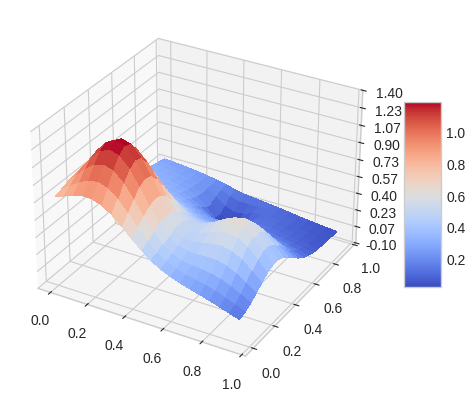

In [3]:
fig = plt.figure()
#ax = fig.gca(projection='3d')
ax = fig.add_subplot(111, projection='3d')

# Plot the surface.
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter("%.02f"))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

Most off the code in the Franke function task is taken from the description in Project 1. 

### Own Code

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X.shape (1000, 10)
z.shape (1000, 1000)
Mse: 0.002053039278719581
R2: 0.9751293361571949


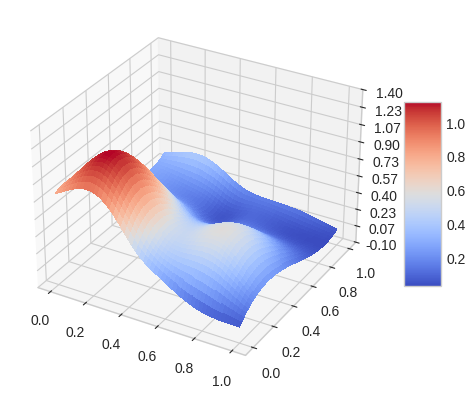

In [5]:
np.random.seed(2024)
x = np.arange(0, 1, 0.001)
y = np.arange(0, 1, 0.001)
xv, yv = np.meshgrid(x, y)
z = FrankeFunction(xv, yv) #Use xv and yv only when plotting the FranckeFunction

# Polynomial degree
degree = 3

# Creating design matrix
X = create_design_matrix(x, y, degree)

print("X.shape", X.shape)
print("z.shape", z.shape)

OLSbeta = np.linalg.pinv(X.T @ X) @ X.T @ z # pinv avoid singular matrix problem, same as reg term

ztilde = X @ OLSbeta

mse = np.mean((z - ztilde)**2)
R2 = 1 - np.sum((z - ztilde)**2) / np.sum((z - np.mean(z))**2)

#print(f"Beta: {OLSbeta}")
print(f"Mse: {mse}")
print(f"R2: {R2}")

fig = plt.figure()
#ax = fig.gca(projection='3d')
ax = fig.add_subplot(111, projection='3d')

# Plot the surface.
surf = ax.plot_surface(xv, yv, ztilde, cmap=cm.coolwarm,
linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter("%.02f"))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()


In [6]:
#x = np.ravel(xv)#.reshape(-1,1)
#y = np.ravel(yv)#.reshape(-1,1)
#z = np.ravel(z)#.reshape(-1, 1)

x = np.arange(0, 1, 0.05) 
y = np.arange(0, 1, 0.05)
z = FrankeFunction(x,y) #Using x,y and z when doing regression
z = z + np.random.randn(z.shape[0])

# Polynomial degrees
degrees = np.arange(0, 5)

# Empty lists to store scores and parameters
beta_values = []
mse_scores = []
r2_scores = []

# Looping through each degree
for degree in degrees:
    # Creating design matrix
    X = create_design_matrix(x, y, degree)
    print(X.shape)

    # Split the data into training and test data
    X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2, random_state=42)

    # Scale and center the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Calculating OLS beta
    #OLSbeta = np.linalg.inv(X.T @ X + reg_term*np.eye(X.shape[1])) @ X.T @ z
    OLSbeta = np.linalg.pinv(X_train.T @ X_train) @ X_train.T @ z_train
    
    print(degree, OLSbeta)
    # Calculating ztilde
    ztilde = X_test @ OLSbeta
    
    # Calculating MSE and R2
    mse = np.mean((z_test - ztilde)**2)
    r2 = 1 - np.sum((z_test - ztilde)**2) / np.sum((z_test - np.mean(z_test))**2)
    
    # Appending beta values and scores
    beta_values.append(OLSbeta)
    mse_scores.append(mse)
    r2_scores.append(r2)


(20, 1)
0 [0.54664683]
(20, 3)
1 [ 1.16637107 -0.6315661  -0.6315661 ]
(20, 6)
2 [ 1.26871783 -0.89112878 -0.89112878  0.16624627  0.16624627  0.16624627]
(20, 10)
3 [ 2.00263945 -4.10857614 -4.10857614  4.98780881  4.98780881  4.98780881
 -2.29585295 -2.29585295 -2.29585295 -2.29585295]
(20, 15)
4 [  0.90811487   2.78224448   2.78224448 -12.39333004 -12.39333004
 -12.39333004  16.49286398  16.49286398  16.49286398  16.49286398
  -7.25020232  -7.25020232  -7.25020232  -7.25020232  -7.25020232]


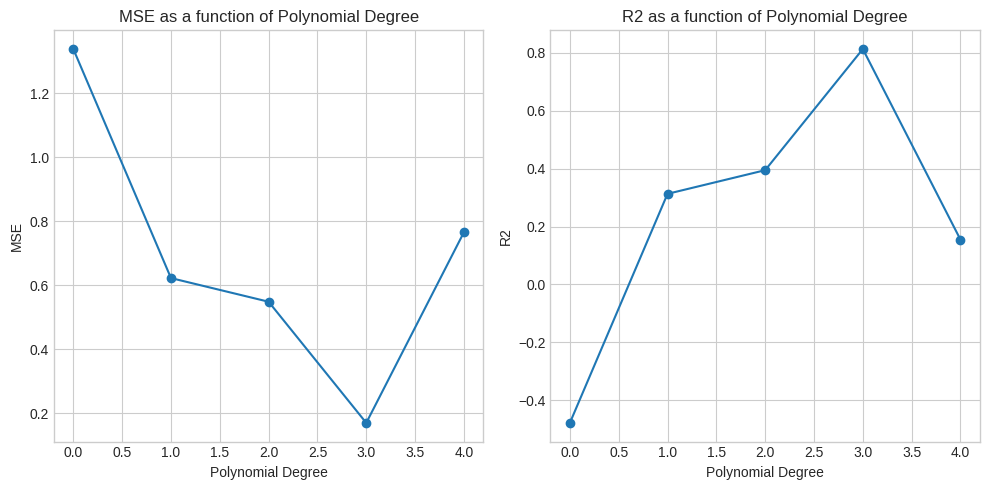

In [7]:
# Plotting MSE and R2 scores
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(degrees, mse_scores, marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE')
plt.title('MSE as a function of Polynomial Degree')

plt.subplot(1, 2, 2)
plt.plot(degrees, r2_scores, marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('R2')
plt.title('R2 as a function of Polynomial Degree')
plt.tight_layout()
plt.show()



degree 0 betavalues 1
[0.38950508]
 
degree 1 betavalues 3
[ 0.79878612 -0.43082214 -0.43082214]
 
degree 2 betavalues 6
[ 1.1078575  -1.46106007 -1.46106007  0.72297398  0.72297398  0.72297398]
 
degree 3 betavalues 10
[ 1.1348057  -1.65675205 -1.65675205  1.07523808  1.07523808  1.07523808
 -0.18540216 -0.18540216 -0.18540216 -0.18540216]
 
degree 4 betavalues 15
[ 1.22847448 -2.93857566 -2.93857566  5.36745079  5.36745079  5.36745079
 -5.54227694 -5.54227694 -5.54227694 -5.54227694  2.25552623  2.25552623
  2.25552623  2.25552623  2.25552623]
 


Text(0.5, 1.0, 'Beta values as a function of a Polynomial Degree')

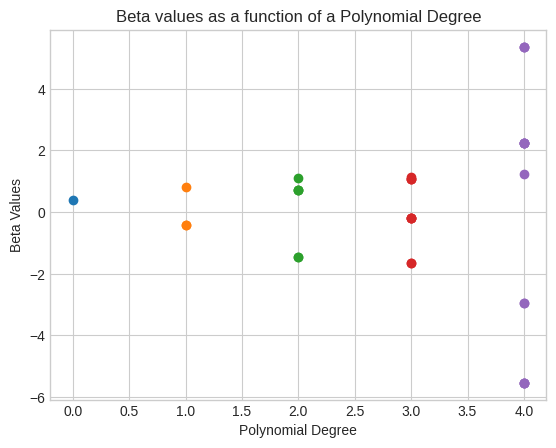

In [10]:
for degree, values in enumerate(beta_values):
    print("degree", degree, "betavalues", len(values))
    print(values)
    print(" ")
    degrees = np.repeat(degree, len(values))
    plt.scatter(degrees, values)

plt.xlabel('Polynomial Degree')
plt.ylabel('Beta Values')
plt.title('Beta values as a function of a Polynomial Degree')

